# Homework ada10

### TMI M1 37-176839 Koichrio Tamura

#### homework1

　次式を証明せよ

$$\sum_{i, i'=1}^{n}{W_{i, i'}\left\| \mathbf{Tx_{i} - Tx_{i'}} \right\| ^{2}}= 2tr(\mathbf{TXLX^{T}T^{T}})$$

\begin{eqnarray}
    \sum_{i, i'=1}^{n}{W_{i, i'}\left\| \mathbf{Tx_{i} - Tx_{i'}} \right\| ^{2}} &=&  2\sum_{i=1}^{n}{\mathbf{x_{i}^{T}T^{T}W_{i,i'}Tx_{i}}} - 2\sum_{i'=1}^{n}{\mathbf{x_{i'}^{T}T^{T}W_{i,i'}Tx_{i'}}}  \\
            &=& 2\sum_{i=1}^{n}{tr(\mathbf{Tx_{i}W_{i,i'}x_{i}^{T}T^{T}})} - 2\sum_{i'=1}^{n}{tr(\mathbf{Tx_{i'}W_{i,i'}x_{i'}^{T}T^{T}})}  \\
                &=& 2tr(\mathbf{TX(D-W)X^{T}T^{T}})\\
                &=& 2tr(\mathbf{TXLX^{T}T^{T}})
\end{eqnarray}

<div style="text-align: right;">
【Q.E.D】
</div>

#### homework2

適当な類似度行列に対して局所性保存射影を実装せよ

In [1]:
%matplotlib inline
import numpy as np
from numpy import random as rnd
from scipy import linalg
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties as fp
from matplotlib.ticker import *

In [2]:
class LPP():
    def __init__(self,h=0.1):
        self.h = h
    
    def __get_rbf_matrix_(self,x,c,h=1.0):
        __Hx_ = np.tile(np.diag(np.dot(x,x.T)),(c.shape[0],1))
        __Hc_ = np.tile(np.diag(np.dot(c,c.T)),(x.shape[0],1))
        __G_ = np.dot(c,x.T)
        __K_ = np.exp(-(__Hx_-2*__G_+__Hc_.T)/(2*self.h**2))
        return __K_
    
    def fit(self,x):
        __W_ = self.__get_rbf_matrix_(x,x)
        __D_ = np.diag(np.sum(__W_,axis=1))
        __L_ = __D_ - __W_
        
        __A_ = np.dot(np.dot(x.T,__L_),x)
        __B_ = np.dot(np.dot(x.T,__D_),x)
        
        __B_inv_sqrt_ = linalg.inv(linalg.sqrtm(__B_)) 
        __C_ = np.dot(np.dot(__B_inv_sqrt_,__A_),__B_inv_sqrt_)
        
        #scipyでは固有値が昇順に並ぶ
        self._lambda, self.xi = linalg.eigh(__C_)
        
        return self
    
    def first_basis(self,X):
        __i_ = len(self.xi) - 1
        return self.xi[__i_][1] / self.xi[__i_][0] * X
    
    def second_basis(self,X):
        return self.xi[0][1] / self.xi[0][0] * X

In [3]:
#dataset
n = 100
train_x1 = np.c_[2*rnd.normal(0,1,n), rnd.normal(0,1,n)]
train_y = np.sign(rnd.uniform(-1,1,n)).astype(int)
train_x2 = np.c_[2*rnd.normal(0,1,n), train_y+rnd.normal(0,1,n)/3]

In [4]:
#LPPの実行
clf1 = LPP(h=0.1)
clf2 = LPP(h=0.1)
clf1.fit(train_x1)
clf2.fit(train_x2)

#比較のため、主成分分析の実行
pca1 = PCA()
pca2 = PCA()
pca1.fit(train_x1)
pca2.fit(train_x2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

/Users/koichiro/.pyenv/versions/anaconda3-2.4.1/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


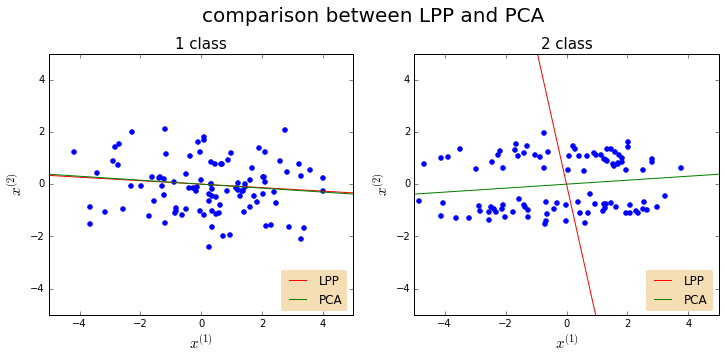

In [5]:
def f(x, xi):
    i = len(xi) - 1
    y = xi[0][1] / xi[0][0] * x
    return y

colors = np.array(['r','','b'])
X = np.linspace(-6,6,1000)


#グラフ描
fig = plt.figure(figsize=(12,5))

plt.suptitle("comparison between LPP and PCA",fontsize=20)

fig.add_subplot(1,2,1)
plt.title("1 class",fontsize=15)
plt.plot(X, clf1.second_basis(X), color='r', label='LPP')
plt.plot(X, f(X,pca1.components_), color='g', label='PCA')
plt.scatter(train_x1[:,0],train_x1[:,1],color='b')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel('$x^{(1)}$',size=15)
plt.ylabel('$x^{(2)}$',size=15)
legend = plt.legend(frameon=1,fancybox=True,\
                    bbox_to_anchor=(1.0, -0.01),loc='lower right')
frame = legend.get_frame()
frame.set_facecolor('wheat')
frame.set_edgecolor('None')

fig.add_subplot(1,2,2)
plt.title('2 class',fontsize=15)
plt.plot(X, clf2.first_basis(X), color='r', label='LPP')
plt.plot(X, f(X,pca2.components_), color='g', label='PCA')
plt.scatter(train_x2[:,0],train_x2[:,1],color='b')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel('$x^{(1)}$',size=15)
plt.ylabel('$x^{(2)}$',size=15)

legend = plt.legend(frameon=1,fancybox=True,\
                    bbox_to_anchor=(1.0, -0.01),loc='lower right')
frame = legend.get_frame()
frame.set_facecolor('wheat')
frame.set_edgecolor('None')

plt.subplots_adjust(top=0.85) 
fig.savefig('ana.png')
fig.show()